KNN From Scratch

In [1]:
import numpy as np  
import pandas as pd 
from scipy.stats import mode
from sklearn.model_selection import train_test_split
# K Nearest Neighbors Classification 
  
class K_Nearest_Neighbors_Classifier() :  
      
    def __init__( self, K ) : 
          
        self.K = K 
          
    # Function to store training set 
          
    def fit( self, X_train, Y_train ) : 
          
        self.X_train = X_train 
          
        self.Y_train = Y_train 
          
        # no_of_training_examples, no_of_features 
          
        self.m, self.n = X_train.shape 
      
    # Function for prediction 
          
    def predict( self, X_test ) : 
          
        self.X_test = X_test 
          
        # no_of_test_examples, no_of_features 
          
        self.m_test, self.n = X_test.shape 
          
        # initialize Y_predict 
          
        Y_predict = np.zeros( self.m_test ) 
          
        for i in range( self.m_test ) : 
              
            x = self.X_test[i] 
              
            # find the K nearest neighbors from current test example 
              
            neighbors = np.zeros( self.K ) 
              
            neighbors = self.find_neighbors( x ) 
              
            # most frequent class in K neighbors 
              
            Y_predict[i] = mode( neighbors )[0][0]     
              
        return Y_predict 
      
    # Function to find the K nearest neighbors to current test example 
            
    def find_neighbors( self, x ) : 
          
        # calculate all the euclidean distances between current  
        # test example x and training set X_train 
          
        euclidean_distances = np.zeros( self.m ) 
          
        for i in range( self.m ) : 
              
            d = self.euclidean( x, self.X_train[i] ) 
              
            euclidean_distances[i] = d 
          
        # sort Y_train according to euclidean_distance_array and  
        # store into Y_train_sorted 
          
        inds = euclidean_distances.argsort() 
          
        Y_train_sorted = self.Y_train[inds] 
          
        return Y_train_sorted[:self.K] 
      
    # Function to calculate euclidean distance 
              
    def euclidean( self, x, x_train ) : 
          
        return np.sqrt( np.sum( np.square( x - x_train ) ) ) 
  
# Driver code 
  
def main() : 
      
    # Importing dataset 
      
    df = pd.read_excel( "Social_Network_Ads.xlsx" ) 
  

    X = df.iloc[:, [2, 3]].values
    y = df.iloc[:, 4].values  
      
    # Splitting dataset into train and test set 
  
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0 ) 
    
    # Model training 
      
    model = K_Nearest_Neighbors_Classifier( K = 3 ) 
      
    model.fit( X_train, Y_train ) 
  
    
    # Prediction on test set 
  
    Y_pred = model.predict( X_test ) 
      
      
    # measure performance 
      
    correctly_classified = 0
      

      
    # counter 
      
    count = 0
      
    for count in range( np.size( Y_pred ) ) : 
          
        if Y_test[count] == Y_pred[count] : 
              
            correctly_classified = correctly_classified + 1
          
              
        count = count + 1
        preds=(correctly_classified / count ) * 100
        tp = ((preds == 1) == (y == 1)).sum()
        fp = ((preds == 1) == (y == 0)).sum()
        fn = ((preds == 0) == (y == 1)).sum()
    print( "Accuracy on test set by our model       :  ", preds )  
    print("Precision", tp / (tp + fp))
    print("recall",tp / (tp + fn))

if __name__ == "__main__" :  
      
    main()

Accuracy on test set by our model       :   78.0
Precision 0.6425
recall 0.5


KNN using scikit -learn

Checking for null values User ID             0
Gender              0
Age                 0
EstimatedSalary     0
Purchased           0
dtype: int64
           User ID         Age   EstimatedSalary    Purchased
count  4.000000e+02  400.000000        400.000000  400.000000
mean   1.569154e+07   37.655000      69742.500000    0.357500
std    7.165832e+04   10.482877      34096.960282    0.479864
min    1.556669e+07   18.000000      15000.000000    0.000000
25%    1.562676e+07   29.750000      43000.000000    0.000000
50%    1.569434e+07   37.000000      70000.000000    0.000000
75%    1.575036e+07   46.000000      88000.000000    1.000000
max    1.581524e+07   60.000000     150000.000000    1.000000


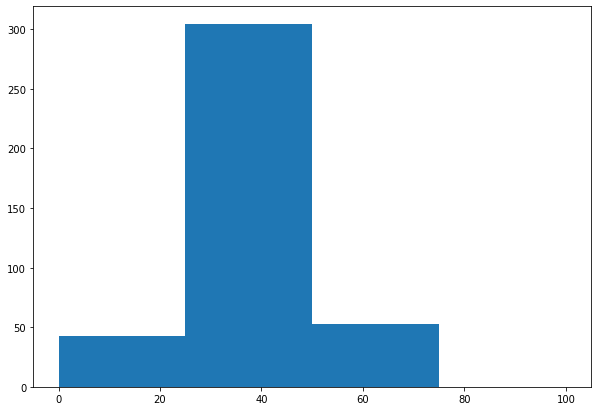

Confusion matrix
 [[64  4]
 [ 3 29]]
classification report

               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


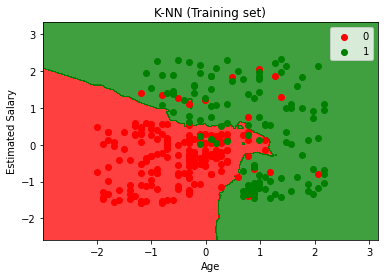

In [23]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt # For plotting
import pandas as pd 
from sklearn.metrics import classification_report, confusion_matrix
# Importing the dataset
dataset = pd.read_excel('Social_Network_Ads.xlsx')
print("Checking for null values",dataset.isnull().sum())
print(dataset.describe())
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
a=dataset.iloc[:,[2]].values
fig, ax = plt.subplots(figsize =(10, 7)) 
ax.hist(a, bins = [0, 25, 50, 75, 100]) 
  
# Show plot 
plt.show() 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Display the confusion matrix
print("Confusion matrix\n",cm)
y_pred = classifier.predict(X_test)
print("classification report\n\n",classification_report(y_test,y_pred))

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


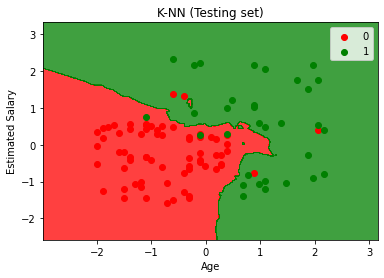


New values
Age
17
Estimated Salary
23555

Predicting the result:
 : [1]


In [ ]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
print("\nNew values")
x1 =int(input('Age\n'))
x2=int(input('Estimated Salary\n'))
print('\nPredicting the result:\n :',classifier.predict([[x1,x2]]))

NAIVE BAYES from Scratch

In [ ]:
class Naive_Bayes():
    def __init__(self):
        self.class_data_dic={}
    
    
        
    def fit(self,X_train,y_train):
        def generate_data(class_data_dic,X_train,y_train):
            first_one=True
            first_zero=True
            for i in range(y_train.shape[0]):
                X_temp=X_train[i,:].reshape(X_train[i,:].shape[0],1)
                if y_train[i]==1:
                    if first_one==True:
                        class_data_dic[1]=X_temp
                        first_one=False
                    else:
                        class_data_dic[1]=np.append(class_data_dic[1],X_temp,axis=1)
                elif y_train[i]==0:
                    if first_zero==True:
                        class_data_dic[0]=X_temp
                        first_zero=False
                    else:
                        class_data_dic[0]=np.append(class_data_dic[0],X_temp,axis=1)
            return class_data_dic
    
        self.X_train=X_train
        self.y_train=y_train
        self.class_data_dic[0]=np.array([[]])
        self.class_data_dic[1]=np.array([[]])
        self.class_data_dic=generate_data(self.class_data_dic,self.X_train,self.y_train)
        self.class_data_dic[0]=self.class_data_dic[0].T
        self.class_data_dic[1]=self.class_data_dic[1].T
        self.mean_0=np.mean(self.class_data_dic[0],axis=0)
        self.mean_1=np.mean(self.class_data_dic[1],axis=0)
        self.std_0=np.std(self.class_data_dic[0],axis=0)
        self.std_1=np.std(self.class_data_dic[1],axis=0)
        
        
    def predict(self,X_test):
        def posterior(X,X_train_class,mean_,std_):
            def likelyhood(x,mean,sigma):
                return np.exp(-(x-mean)**2/(2*sigma**2))*(1/(np.sqrt(2*np.pi)*sigma))
            
            product=np.prod(likelyhood(X,mean_,std_),axis=1)
            product=product*(X_train_class.shape[0]/self.X_train.shape[0])
            return product
        
        p_1=posterior(X_test,self.class_data_dic[1],self.mean_1,self.std_1)
        p_0=posterior(X_test,self.class_data_dic[0],self.mean_0,self.std_0)
        return 1*(p_1>p_0)

In [ ]:
Data=pd.read_excel("Social_Network_Ads.xlsx")

train_size=int(0.75*Data.shape[0])
test_size=int(0.25*Data.shape[0])
print("Training set size : "+ str(train_size))
print("Testing set size : "+str(test_size))

Training set size : 300
Testing set size : 100


In [ ]:
nb=Naive_Bayes()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)


NAIVE BAYES using scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("classification report\n\n",classification_report(y_test,y_pred))

classification report

               precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


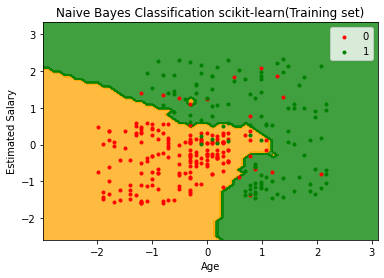


New values
Age
22
Estimated Salary
3445

Predicting the result:
 : [1]


In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('Naive Bayes Classification scikit-learn(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
print("\nNew values")
x1 =int(input('Age\n'))
x2=int(input('Estimated Salary\n'))
print('\nPredicting the result:\n :',classifier.predict([[x1,x2]]))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


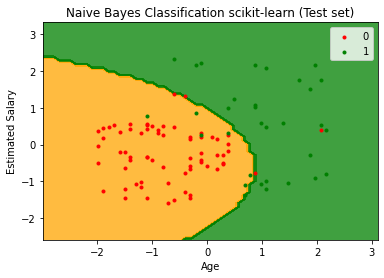

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.1))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j,marker='.')
plt.title('Naive Bayes Classification scikit-learn (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()